# k최근접이웃_교차검증(by 이미희)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#데이터 로드
crops = pd.read_csv('./data/dataset.csv', thousands=',')

# 품종별 Label 붙이기
def result(row):
    if row[0] == '딸기':
        return 0
    elif row[0] == '토마토':
        return 1
    else:
        return 2

crops['Label'] = crops.apply(result,axis=1)

# Label 종류별 갯수확인
crops['Label'].value_counts()

# 결측치 확인
crops.isnull().sum()

# 결측치 행 삭제 및 확인
crops1 = crops.dropna(axis=0)
crops1.isnull().sum()

crops1_input = crops1[['외부 일사량','내부온도','내부습도','내부CO2']]
print(crops1_input[:5])

crops1_target = crops1['Label']

train_input,test_input,train_target,test_target = train_test_split(crops1_input, crops1_target,test_size=0.2)

# StandardScaler(표준화)로 데이터 셋 변환
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

#모델 학습
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, train_target)
train_score = kn.score(train_scaled, train_target)
test_score = kn.score(test_scaled, test_target)
print(f'훈련 점수 : {train_score :.4f}, 테스트 점수 : {test_score :.4f} ')




   외부 일사량  내부온도  내부습도  내부CO2
0   223.0  17.0  58.0  500.0
1   114.0  12.0  74.0  586.0
2   140.0  10.0  83.0  557.0
3   177.0  10.0  84.0  525.0
4    64.0  10.0  84.0  565.0
훈련 점수 : 0.9205, 테스트 점수 : 0.8925 


In [ ]:
# 교차검증
import multiprocessing
from sklearn.model_selection import cross_validate

cross_validate(
    estimator = KNeighborsClassifier(),
    X=crops1_input, y=crops1_target,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
# 최적화 하기
param_grid = [{'n_neighbors': [3,5,7],
                'weights': ['uniform', 'distance'],
                'algorithm': ['ball_tree','kd_tree', 'brute']}]

# GridSearch
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

gs.fit(crops1_input, crops1_target)

# 최적의 결과
print(gs.best_score_)


In [ ]:
# 시각화- 함수 만들기
def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **parrams):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(x.shape)
    out = plt.contourf(xx,yy,Z,**params)

    return out

# 시각화(TSNE:저차원..?)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)  #밑에 df에서 2개의 feature로 나옴
X_comp = tsne.fit_transform(crops1_input)

crops1_comp_df = pd.DataFrame(data=X_comp)
crops1_comp_df['Label'] = crops1_target
crops1_comp_df



In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

plt.scatter(X_comp[:,0], X_comp[:,1],
            c=crops1_target, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# 로지스틱_다중분류(by 추동헌)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax

grass = pd.read_csv('./data/dataset.csv',thousands=',')

# 결측치 확인
grass.isnull().sum()

#결측치 제거
grass.dropna(axis=0,inplace=True)

grass_input= grass[['외부 일사량','내부온도','내부습도','내부CO2','지습']].to_numpy()

grass_target = grass['품목명'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(grass_input,grass_target,random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
train_score = lr.score(train_scaled, train_target)
test_score = lr.score(test_scaled, test_target)
print(f'훈련 점수 : {train_score :.4f}, 테스트 점수 : {test_score :.4f} ')

훈련 점수 : 0.9069, 테스트 점수 : 0.8999 


# 랜덤 포레스트(by 정서현)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

veggie = pd.read_csv('./data/dataset.csv', thousands= ',')
veggie.head()

veggie.dropna(inplace=True)

data = veggie[['외부 일사량', '내부온도', '내부습도' ,'내부CO2','지습']].to_numpy()
target = veggie['품목명'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

rf.fit(train_input, train_target)
print(rf.feature_importances_)

- 위 결과값 : 외부 일사량, 내부온도, 내부습도, 내부co2,지습 순서대로 중요도
- => 지습의 중요도가 가장 높다!

In [ ]:
# 랜덤포레스트에서 자체적으로 모델을 평가하는 점수
# oob(Out Of Bag) 샘플을 활용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가할 수 있음.

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

# 결정 트리(by 이태호)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#데이터 로드
farmdata = pd.read_csv('./data/dataset.csv', thousands=',')

#결측치 제거
farmdata.dropna(inplace=True)

#데이터 분할
data = farmdata[['외부 일사량', '내부온도', '내부습도', '내부CO2', '지습']].to_numpy()
target = farmdata['품목명'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=4,max_depth=7)

# DecisionTreeClassifer 학습. 
dt_clf.fit(train_input , train_target)

#예측하기
pred = dt_clf.predict(test_input)

#평가하기
print(f'결정트리 정확도 : {accuracy_score(test_target,pred): .4f}')

결정트리 정확도 :  0.9732


# 보팅(Voting)-KNN+DecisionTree(by 이태호)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

#데이터 로드
farmdata = pd.read_csv('./data/dataset.csv', thousands=',')

#결측치 제거
farmdata.dropna(inplace=True)

#데이터 분할
data = farmdata[['외부 일사량', '내부온도', '내부습도', '내부CO2', '지습']].to_numpy()
target = farmdata['품목명'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

#모델 생성
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=6,max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=8)
svc_clf = SVC(probability=True,kernel='linear')

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('DT',dt_clf),('KNN',knn_clf),('SVC',svc_clf)] , voting='soft' ) 
#소프트 보팅방식

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(train_input , train_target)
pred = vo_clf.predict(test_input)
print('Voting 정확도: {0:.4f}'.format(accuracy_score(test_target , pred)))


KeyboardInterrupt: 

==> 모델의 실행속도가 느려 적합하지 않다고 판단.

# XGBoost(by 이태호)

In [ ]:
# XGBoost 설치
!pip install -U xgboost

In [ ]:
import xgboost as xgb #파이썬 wrapper 클래스
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#데이터 로드
farmdata = pd.read_csv('./data/dataset.csv', thousands=',')

#결측치 제거
farmdata.dropna(inplace=True)

plants = ['딸기', '토마토', '파프리카']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(plants)
labels = encoder.transform(plants)
label_farmdata = farmdata.apply(LabelEncoder().fit_transform)


In [ ]:
#데이터 분할
data = label_farmdata[['외부 일사량', '내부온도', '내부습도', '내부CO2', '지습']].to_numpy()
target = label_farmdata['품목명'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(data=train_input , label=train_target)
dtest = xgb.DMatrix(data=test_input , label=test_target)

# 모델 튜닝
params = { 'max_depth':3, #트리깊이
           'eta': 0.1, #학습률
           'objective':'multi:softmax', #다중분류
           'num_class':3,
           'eval_metric':'merror', #평가지표
        }
num_rounds = 400

# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기
wlist = [(dtrain,'train'),(dtest,'eval') ]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , early_stopping_rounds=100, evals=wlist )



In [40]:
pred_probs = xgb_model.predict(dtest)
print('predict을 통해 수행한 결과값 중 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]

print('예측값 10개만 표시:',preds[:10])

predict을 통해 수행한 결과값 중 10개만 표시, 예측 확률 값으로 표시됨
[2. 1. 0. 2. 1. 2. 0. 2. 0. 2.]
예측값 10개만 표시: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1]


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(test_target, pred=None, pred_proba=None):
    confusion = confusion_matrix( test_target, pred)
    accuracy = accuracy_score(test_target , pred)
    precision = precision_score(test_target , pred, average='micro')
    recall = recall_score(test_target , pred, average='micro')
    f1 = f1_score(test_target,pred, average='micro')
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [61]:
get_clf_eval(test_target , preds, pred_probs)

오차 행렬
[[ 751    6    0]
 [  13  660    0]
 [   0 1296    0]]
정확도: 0.5176, 정밀도: 0.5176, 재현율: 0.5176,    F1: 0.5176


==> 예제에서 학습한 내용을 바탕으로 이진분류를 다중분류로 바꾸어서 적용해보았다.
그 결과 모든 값이 0.5176으로 동일하게 나왔으므로 모델링이 제대로 이루어지지 않았음을 알 수 있다.

==> 원인은 2가지 중 하나로 판단된다.
1. preds를 구성할 때 예측 확률값이 제대로 나오지 않았으므로 list가 제대로 구성되지 않았다.

2. get_clf_eval 함수를 생성할 때 default값이 binary로 되어있어 이를 다중분류로 바꾸어 주는데 문제가 발생하였다.

but! 랜덤 포레스트 모델이 뛰어난 성능을 보여주고 있으며 프로젝트 기간의 문제로 XGBoost는 여기까지를 한계로 둔다.

# LightGBM(by 이태호)

In [ ]:
!pip install -U lightgbm

In [1]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#데이터 로드
farmdata = pd.read_csv('./data/dataset.csv', thousands=',')

#결측치 제거
farmdata.dropna(inplace=True)

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
plants = ['딸기', '토마토', '파프리카']

encoder = LabelEncoder()
encoder.fit(plants)
labels = encoder.transform(plants)
label_farmdata = farmdata.apply(LabelEncoder().fit_transform)

#데이터 분할
data = label_farmdata[['외부 일사량', '내부온도', '내부습도', '내부CO2', '지습']].to_numpy()
target = label_farmdata['품목명'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=False)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]


c:\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}'.format(accuracy))

In [3]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[ 756    1    0]
 [  16  653    4]
 [   0    2 1294]]
정확도: 0.9916


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

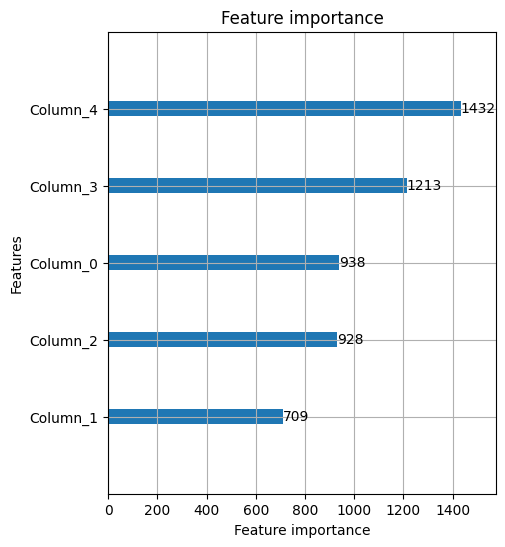

In [4]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 6))
plot_importance(lgbm_wrapper, ax=ax)

# GridSearch CV

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#데이터 로드
farmdata = pd.read_csv('./data/dataset.csv', thousands=',')

#결측치 제거
farmdata.dropna(inplace=True)

#데이터 분할
data = farmdata[['외부 일사량', '내부온도', '내부습도', '내부CO2', '지습']].to_numpy()
target = farmdata['품목명'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

#훈련 데이터안에서 검증데이터 분할
sub_input, val_input, sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2, random_state=42)

#모델 생성
dt = DecisionTreeClassifier(random_state=156,min_samples_leaf=4,max_depth=7)

#모델 학습
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9751232374183194
0.9724896836313618


In [3]:
# 교차검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input,train_target)
print(scores)

{'fit_time': array([0.01795363, 0.01894855, 0.01994777, 0.02194047, 0.02493382]), 'score_time': array([0.00199318, 0.00099754, 0.00199461, 0.00199533, 0.00398898]), 'test_score': array([0.98074278, 0.97615773, 0.9738652 , 0.97799175, 0.97522936])}


In [7]:
# 분류모델이기 때문에 KFold가 아닌 StratifiedKFold사용
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input,train_target,cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.9767973617017697


In [12]:
from sklearn.model_selection import GridSearchCV
# 탐색할 매개변수의 값의 리스트를 딕셔너리로 만듬
params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}

# 모델 객체 생성
gs = GridSearchCV(DecisionTreeClassifier(random_state=156,min_samples_leaf=4,max_depth=7), params, n_jobs=-1)

# 모델 훈련(min_impurity_decrease5 *교차검증(5) = 25개의 모델을 훈련)
gs.fit(train_input, train_target)

# 점수가 가장 높은 하이퍼파라미터로 훈련한 모델이 저장
dt=gs.best_estimator_

print(f'검증점수 : {dt.score(train_input,train_target):0.4f}')
print(f'최적의 매개변수 : {gs.best_params_}')

검증점수 : 0.9802
최적의 매개변수 : {'min_impurity_decrease': 0.0001}


In [11]:
print(gs.cv_results_['mean_test_score'])

[0.97716429 0.97551329 0.97532985 0.97340404 0.97276214]
